#  WeatherPy

# Analysis
1. There is a strong negative relationship between latitiude and temperature in the northern hemisphere, meaning that an increase in latitude causes a decrease in temperature. This makes sense since as you move further away from the equator, it gets colder. The r-squared value of 0.76 means that our data is a good fit for the model. 
2. There is a weaker positive relationship between latitude and temperature in the southern hemisphere, meaning that an increase in latitude results in an increase in temperature. The r-squared value of 0.43 means that some of the data presented is a good fit for the model, but it's not as close a fit of the data like the northern hemisphere. 
3. There is a weak positive relationship between latitude and humidity in the northern hemisphere, meaning that an increase in latitude could cause an increase in humidity. Since the r-squared values is only 0.15, we cannot rely on the data being a good fit for the model since most of the values are not plotted close to the regression line. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

# Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Establish base URL to test a city
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Boston"


# Build query URL
query_url = url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key

In [4]:
# Check that API Key is working
weather_api_key

'67f3518c2599ae046961d6e603a09e16'

In [5]:
# Test a random city
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 14.76,
  'feels_like': 0.79,
  'temp_min': 12.2,
  'temp_max': 17.01,
  'pressure': 1024,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 320},
 'clouds': {'all': 20},
 'dt': 1612021175,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1612007977,
  'sunset': 1612043723},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Create empty lists to hold the temperature, humidity, cloudiness, and wind speeds of each city 
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
city_names = []
country = []
date = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key
    weather_response = requests.get(query_url).json()
    
    try: 
        max_temperature.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        city_names.append(weather_response['name'])
        print(f"Processing Record {city}")
        
    except:
        print("City not found. Skipping")
        pass

Processing Record saint-philippe
Processing Record pevek
Processing Record butaritari
Processing Record alekseyevskaya
Processing Record vaini
City not found. Skipping
Processing Record lalitpur
Processing Record gloversville
Processing Record sao joao nepomuceno
Processing Record zabid
Processing Record gizo
Processing Record horst
Processing Record severo-kurilsk
Processing Record tasiilaq
Processing Record kailua
Processing Record thompson
Processing Record punta arenas
Processing Record bowen
Processing Record bambous virieux
Processing Record albany
Processing Record kaitangata
Processing Record north bend
Processing Record mayo
Processing Record salalah
Processing Record kontagora
Processing Record omboue
Processing Record port hardy
Processing Record flinders
Processing Record chokurdakh
City not found. Skipping
City not found. Skipping
Processing Record east london
Processing Record norrtalje
Processing Record rikitea
Processing Record abu kamal
Processing Record mar del plata


Processing Record chicama
Processing Record qaqortoq
Processing Record yerofey pavlovich
Processing Record georgetown
Processing Record pemangkat
Processing Record neiafu
Processing Record cuamba
Processing Record kununurra
Processing Record waitati
Processing Record iqaluit
Processing Record kharp
Processing Record poronaysk
Processing Record sinnamary
Processing Record xai-xai
Processing Record onalaska
Processing Record chadiza
Processing Record grand forks
Processing Record seymchan
Processing Record cassilandia
Processing Record arraial do cabo
Processing Record west wendover
Processing Record freeport
Processing Record sayyan
Processing Record belyy yar
Processing Record zhigansk
Processing Record abong mbang
Processing Record beboto
Processing Record lompoc
Processing Record nhulunbuy
Processing Record carutapera
Processing Record nishihara
City not found. Skipping
Processing Record mangrol
Processing Record villazon
Processing Record krasnoselkup
Processing Record evensk
City n

Processing Record san jose
Processing Record nicoya
Processing Record estacion coahuila
Processing Record sangar
Processing Record port-gentil
Processing Record jalu
Processing Record constitucion
Processing Record zhongshu
Processing Record maceio
Processing Record columbus
Processing Record kamaishi
Processing Record the pas
Processing Record gazalkent
Processing Record correia pinto
Processing Record moron
Processing Record yabrud
Processing Record zastron
Processing Record santa cruz de la palma
Processing Record darovskoy
City not found. Skipping
Processing Record golkoy


# Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [7]:
# Make sure array lengths match
print(len(city_names))
print(len(latitude))
print(len(longitude))
print(len(max_temperature))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

573
573
573
573
573
573
573
573
573


In [8]:
# Create new Data Frame with data
weather_df = pd.DataFrame({'City': city_names,
                           'Latitude': latitude,
                           'Longitude': longitude,
                           'Max Temp': max_temperature,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date})
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,82.40,69,0,13.80,RE,1612021691
1,Pevek,69.7008,170.3133,-32.60,85,48,3.06,RU,1612021691
2,Butaritari,3.0707,172.7902,80.62,77,93,17.34,KI,1612021692
3,Alekseyevskaya,50.2896,42.1845,34.00,89,99,1.99,RU,1612021692
4,Vaini,-21.2000,-175.2000,73.40,94,90,6.91,TO,1612021692
...,...,...,...,...,...,...,...,...,...
568,Yabrūd,33.9674,36.6574,46.40,87,75,13.80,SY,1612021761
569,Zastron,-30.3023,27.0840,79.57,23,1,7.20,ZA,1612021762
570,Santa Cruz de La Palma,28.6835,-17.7642,68.00,73,75,13.80,ES,1612021762
571,Darovskoy,58.7700,47.9564,29.05,98,100,13.20,RU,1612021762


In [9]:
# Get summary statistics
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,18.031926,16.900321,50.868028,70.579407,50.743455,8.382077,1.612022e+09
std,33.400408,91.960436,35.361859,21.445884,39.387427,5.902202,6.261817e+01
min,-54.800000,-179.166700,-49.230000,1.000000,0.000000,0.220000,1.612021e+09
25%,-9.443100,-66.100000,30.200000,58.000000,3.000000,3.780000,1.612022e+09
50%,21.346900,20.040300,64.400000,76.000000,53.000000,6.910000,1.612022e+09
75%,45.233300,102.265500,78.490000,86.000000,90.000000,11.500000,1.612022e+09
max,78.218600,179.316700,101.440000,100.000000,100.000000,31.070000,1.612022e+09


In [10]:
# Create the output File (CSV)
weather_df_csv = "WeatherPy.csv"

# Export the city_data into a csv
weather_df.to_csv(weather_df_csv, index_label="City_ID")

#  Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [11]:
#  Create a new DataFrame only with cities that have humidity less than or equal to 100% 
humidity_df = weather_df[weather_df["Humidity"] <= 100]
humidity_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,82.40,69,0,13.80,RE,1612021691
1,Pevek,69.7008,170.3133,-32.60,85,48,3.06,RU,1612021691
2,Butaritari,3.0707,172.7902,80.62,77,93,17.34,KI,1612021692
3,Alekseyevskaya,50.2896,42.1845,34.00,89,99,1.99,RU,1612021692
4,Vaini,-21.2000,-175.2000,73.40,94,90,6.91,TO,1612021692
...,...,...,...,...,...,...,...,...,...
568,Yabrūd,33.9674,36.6574,46.40,87,75,13.80,SY,1612021761
569,Zastron,-30.3023,27.0840,79.57,23,1,7.20,ZA,1612021762
570,Santa Cruz de La Palma,28.6835,-17.7642,68.00,73,75,13.80,ES,1612021762
571,Darovskoy,58.7700,47.9564,29.05,98,100,13.20,RU,1612021762


In [12]:
# Get summary statistics
humidity_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,18.031926,16.900321,50.868028,70.579407,50.743455,8.382077,1.612022e+09
std,33.400408,91.960436,35.361859,21.445884,39.387427,5.902202,6.261817e+01
min,-54.800000,-179.166700,-49.230000,1.000000,0.000000,0.220000,1.612021e+09
25%,-9.443100,-66.100000,30.200000,58.000000,3.000000,3.780000,1.612022e+09
50%,21.346900,20.040300,64.400000,76.000000,53.000000,6.910000,1.612022e+09
75%,45.233300,102.265500,78.490000,86.000000,90.000000,11.500000,1.612022e+09
max,78.218600,179.316700,101.440000,100.000000,100.000000,31.070000,1.612022e+09


# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

#  Latitude vs. Temperature Plot

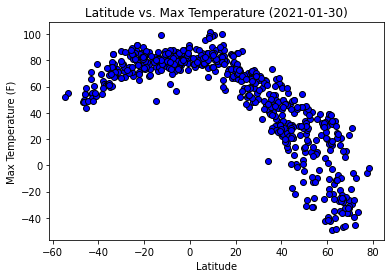

In [13]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
temperature_scatter = humidity_df["Max Temp"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, temperature_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%Y-%m-%d')

# Add title and labels
plt.title(f"Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save as png
plt.savefig("Lat_Temp.png")

This graph is analyzing the relationship between latitude and temperature. Based on the scatter plot returned, temperature is affected by distance from the equator, so as you move further away from it, the temperature decreases. 

#  Latitude vs. Humidity Plot

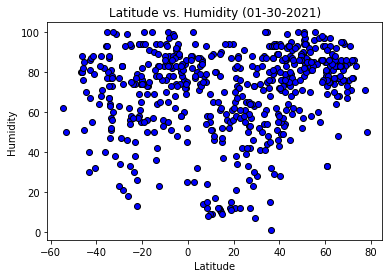

In [14]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
humidity_scatter = humidity_df["Humidity"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, humidity_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add title and labels
plt.title(f"Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save as png
plt.savefig("Lat_Hum.png")

This graph is analyzing the relationship between latitude and humidity. Based on the scatter plot returned, there is no clear relationship between the two variables. 

# Latitude vs. Cloudiness Plot

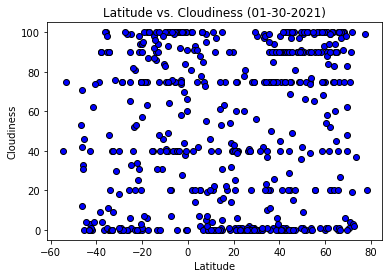

In [15]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
cloudiness_scatter = humidity_df["Cloudiness"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, cloudiness_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add title and labels
plt.title(f"Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save as png
plt.savefig("Lat_Cloud.png")

This graph is analyzing the relationship between latitude and cloudiness. Based on the scatter plot returned, there is no clear relationship between the two variables.

# Latitude vs. Wind Speed Plot

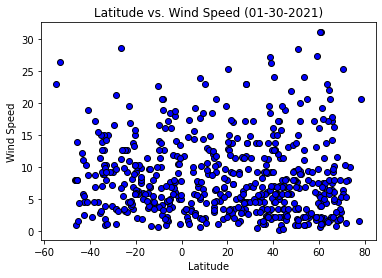

In [16]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
wind_scatter = humidity_df["Wind Speed"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, wind_scatter, edgecolors = 'black', color = 'blue')

# Find date and fix formatting
weather_date = datetime.fromtimestamp(humidity_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add title and labels
plt.title(f"Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save as png
plt.savefig("Lat_Wind.png")

This graph is analyzing the relationship between latitude and wind speed. Based on the scatter plot returned, there is no clear relationship between the two variables.

#  Linear Regression

In [17]:
# Create new dataframes for northern and southern hemispheres
northern_hem_df = humidity_df[humidity_df["Latitude"] >= 0] 
southern_hem_df = humidity_df[humidity_df["Latitude"] <= 0]

#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.766573826688943


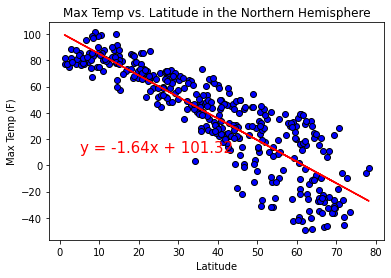

In [30]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_max_temp = northern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_max_temp)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_max_temp, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (5,10), fontsize=15, color ="red")
plt.title("Max Temp vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared value is {rvalue**2}")

# Save as png
plt.savefig("Nor_Lat_Temp.png")

This linear regression model is showing that there is a strong negative relationship between latitude and temperature in the northern hemisphere. Since the r-squared value is 0.77, this indicates that the model shown is a good fit for the data set, meaning that the data points are falling close to the fitted regression line. 

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.42552700229600743


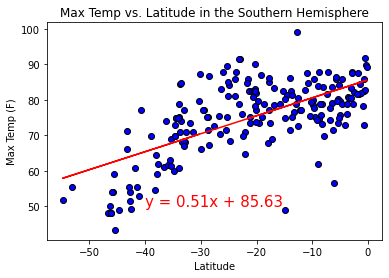

In [31]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_max_temp = southern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_max_temp)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_max_temp, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,50), fontsize=15, color ="red")
plt.title("Max Temp vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared value is {rvalue**2}")

# Save as png
plt.savefig("Sou_Lat_Temp.png")

This linear regression model is showing that there is a positive relationship between latitude and temperature in the southern hemisphere. Since the r-squared value is 0.43, this indicates that the model shown is an ok fit for the data set, meaning that some data points are falling close to the fitted regression line. 

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.1530512077151247


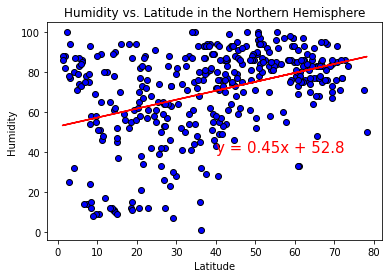

In [32]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_humidity = northern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_humidity)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_humidity, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (40,40), fontsize=15, color ="red")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue**2}")

# Save as png
plt.savefig("Nor_Lat_Hum.png")

This linear regression model is showing that there is a positive relationship between latitude and humidity in the northern hemisphere. Since the r-squared value is 0.15, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line. 

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.020667869439029655


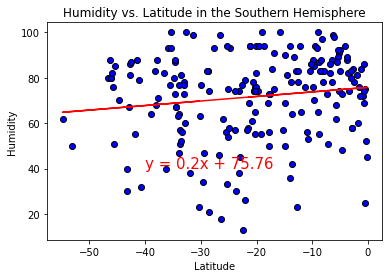

In [33]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_humidity = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_humidity)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_humidity, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,40), fontsize=15, color ="red")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue**2}")

# Save as png
plt.savefig("Sou_Lat_Hum.png")

This linear regression model is showing that there is a positive relationship between latitude and humidity in the southern hemisphere. Since the r-squared value is 0.02, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.07664224501597454


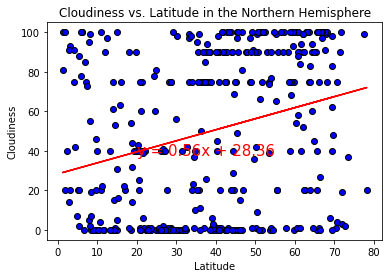

In [34]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_cloudiness = northern_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_cloudiness)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_cloudiness, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (20,38), fontsize=15, color ="red")
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is {rvalue**2}")

# Save as png
plt.savefig("Nor_Lat_Cloud.png")

This linear regression model is showing that there is a positive relationship between latitude and cloudiness in the northern hemisphere. Since the r-squared value is 0.0, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.020667869439029655


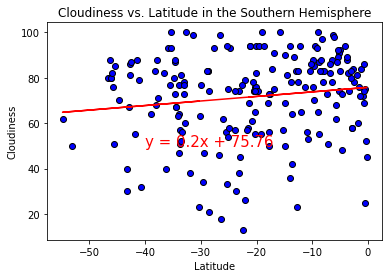

In [35]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_cloudiness = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_cloudiness)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_cloudiness, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,50), fontsize=15, color ="red")
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is {rvalue**2}")


# Save as png
plt.savefig("Sou_Lat_Cloud.png")

This linear regression model is showing that there is a positive relationship between latitude and cloudiness in the southern hemisphere. Since the r-squared value is 0.03, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 1.848632754448617e-05


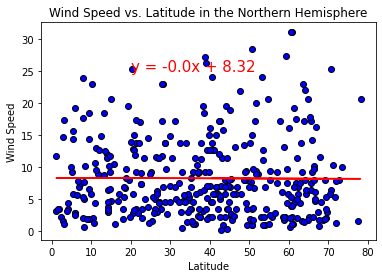

In [38]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_wind = northern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_wind)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_wind, edgecolors = 'black', color = 'blue')
plt.plot(northern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (20,25), fontsize=15, color ="red")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue**2}")

# Save as png
plt.savefig("Nor_Lat_Wind.png")

This linear regression model is showing that there is a negative relationship between latitude and wind speed in the northern hemisphere. Since the r-squared value is 0.002, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.

#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.005255397711476431


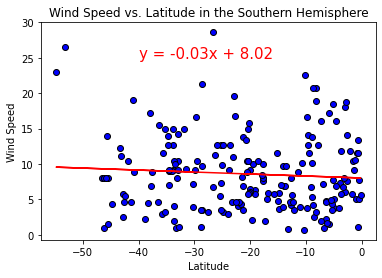

In [37]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_wind = southern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_wind)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_wind, edgecolors = 'black', color = 'blue')
plt.plot(southern_latitude,regress_values,"r-", color = "red")
plt.annotate(line_eq, (-40,25), fontsize=15, color ="red")
plt.title("Wind Speed vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue**2}")

# Save as png
plt.savefig("Sou_Lat_Wind.png")

This linear regression model is showing that there is a negative relationship between latitude and wind speed in the southern hemisphere. Since the r-squared value is 0.13, this indicates that the model shown is not a good fit for the data set, meaning that the majority of data points are not falling close to the fitted regression line.